## Emergency Vehicle Identification

### Importing the necessary library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
%matplotlib inline

### Directory Assignment

In [2]:
train_dir = r'C:\Users\Abisola\Downloads\Emergency_Vehicles\train'
test_dir = r'C:\Users\Abisola\Downloads\Emergency_Vehicles\test'

### Reading the first image

In [3]:
image = cv2.imread(r'C:\Users\Abisola\Downloads\Emergency_Vehicles\train\1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #

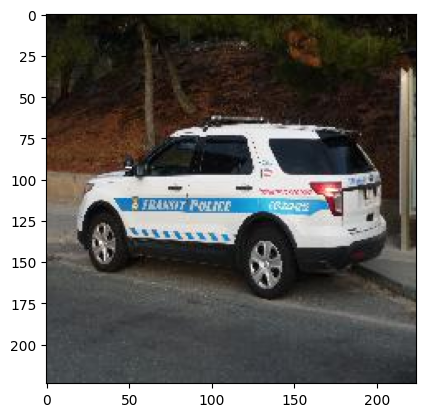

In [4]:
plt.imshow(image)

In [5]:
image.shape # This shows the shape of the image (length, width, chanel) 

(224, 224, 3)

### Preprocessing

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
# Keras image data generator is used for the generation of images

from keras.preprocessing.image import ImageDataGenerator 

In [8]:
# Applying our desired transformation
image_gen = ImageDataGenerator(
        rotation_range=20, # specifies the rotation to be 20%
        width_shift_range=0.1, #specifies the width shift of 10%
        height_shift_range=0.1, # specifies the height shift of 10%
        shear_range=0.20, # crops part of the image
        zoom_range=0.20, # zooms the image by 20%
        fill_mode='nearest', # fills using the nearest pixel
        horizontal_flip=True, # Specifies the horizontal flip
        rescale=1/255 # Scales the image
)

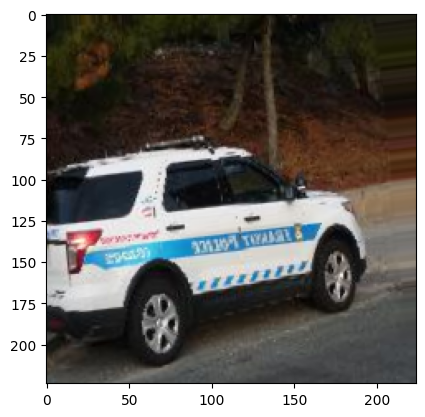

In [9]:
# SHowing the transformation
plt.imshow(image_gen.random_transform(image))

In [10]:
train_df=pd.read_csv(r'C:\Users\Abisola\Downloads\Emergency_Vehicles\train.csv')
test_df=pd.read_csv(r'C:\Users\Abisola\Downloads\Emergency_Vehicles\test.csv')

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       706 non-null    object
 1   emergency_or_not  706 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.8+ KB


In [13]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [14]:
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

In [15]:
test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [17]:
train_generator = image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify dataset for training
                                                directory=train_dir, # specify the path to the directory
                                                x_col='image_names', # specify the names of the images
                                                y_col='emergency_or_not', # specifies the class labels
                                                class_mode='binary', # specifies the kind of classification
                                                target_size=(224,224), # specifies the dimension to resize the image
                                                batch_size=50# defines the batch size 
                                                )

validation_generator = image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for training
                                                     directory=train_dir, # specify the path to the directory
                                                     x_col='image_names', # specify the names of the images
                                                     y_col='emergency_or_not', # specifies the class labels
                                                     class_mode='binary', # specifies the kind of classification
                                                     target_size=(224,224), # specifies the dimension to resize the im
                                                     batch_size=50 # defines the batch size
                                                 ) 


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


### Constructor stage

In [18]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

In [19]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


### Compilation Stage

In [20]:
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics='accuracy')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 50)                20070450  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

### Training Stage

In [22]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

C:\Users\Abisola\AppData\Local\Temp\ipykernel_21120\2581043468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 44s 2s/step - loss: 3.1902 - accuracy: 0.5374 - val_loss: 0.6848 - val_accuracy: 0.6069
Epoch 2/10
23/23 [==============================] - 41s 2s/step - loss: 0.6950 - accuracy: 0.5574 - val_loss: 0.6731 - val_accuracy: 0.6633
Epoch 3/10
23/23 [==============================] - 71s 3s/step - loss: 0.6680 - accuracy: 0.6357 - val_loss: 0.6482 - val_accuracy: 0.7097
Epoch 4/10
23/23 [==============================] - 71s 3s/step - loss: 0.6408 - accuracy: 0.6600 - val_loss: 0.6131 - val_accuracy: 0.7157
Epoch 5/10
23/23 [==============================] - 72s 3s/step - loss: 0.6349 - accuracy: 0.6452 - val_loss: 0.5770 - val_accuracy: 0.7056
Epoch 6/10
23/23 [==============================] - 74s 3s/step - loss: 0.6080 - accuracy: 0.6748 - val_loss: 0.6002 - val_accuracy: 0.6855
Epoch 7/10
23/23 [==============================] - 72s 3s/step - loss: 0.6016 - accuracy: 0.6896 - val_loss: 0.5342 - val_accuracy: 0.7621
Epoch 8/10
23/23 [==

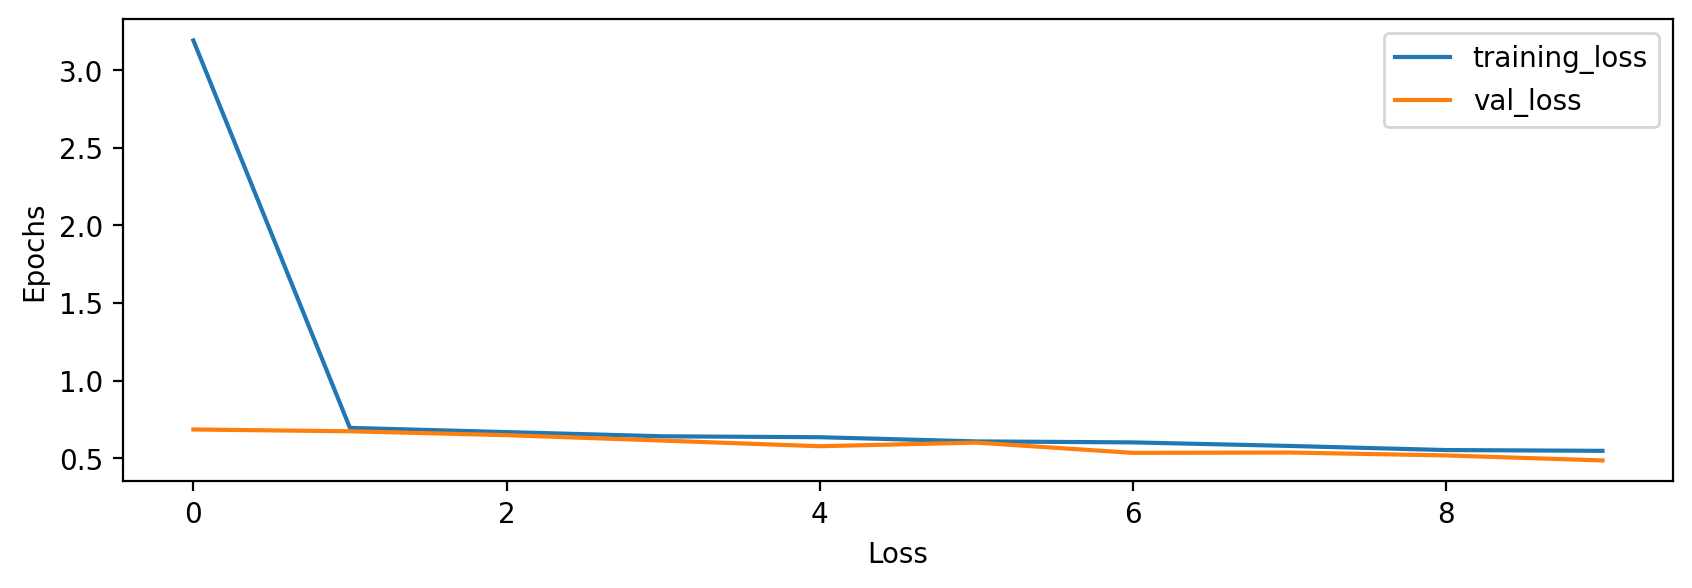

In [23]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

### Increasing the number of layers to 2

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


In [25]:
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics='accuracy')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 193600)            0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [27]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

C:\Users\Abisola\AppData\Local\Temp\ipykernel_21120\2581043468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 113s 5s/step - loss: 1.8676 - accuracy: 0.5330 - val_loss: 0.6719 - val_accuracy: 0.6996
Epoch 2/10
23/23 [==============================] - 110s 5s/step - loss: 0.6547 - accuracy: 0.6348 - val_loss: 0.6050 - val_accuracy: 0.6956
Epoch 3/10
23/23 [==============================] - 109s 5s/step - loss: 0.6394 - accuracy: 0.6626 - val_loss: 0.5883 - val_accuracy: 0.7238
Epoch 4/10
23/23 [==============================] - 110s 5s/step - loss: 0.6039 - accuracy: 0.6774 - val_loss: 0.5423 - val_accuracy: 0.7258
Epoch 5/10
23/23 [==============================] - 110s 5s/step - loss: 0.6016 - accuracy: 0.7052 - val_loss: 0.5416 - val_accuracy: 0.7681
Epoch 6/10
23/23 [==============================] - 109s 5s/step - loss: 0.5678 - accuracy: 0.7191 - val_loss: 0.5070 - val_accuracy: 0.7782
Epoch 7/10
23/23 [==============================] - 112s 5s/step - loss: 0.5584 - accuracy: 0.7287 - val_loss: 0.4737 - val_accuracy: 0.7883
Epoch 8/10
23

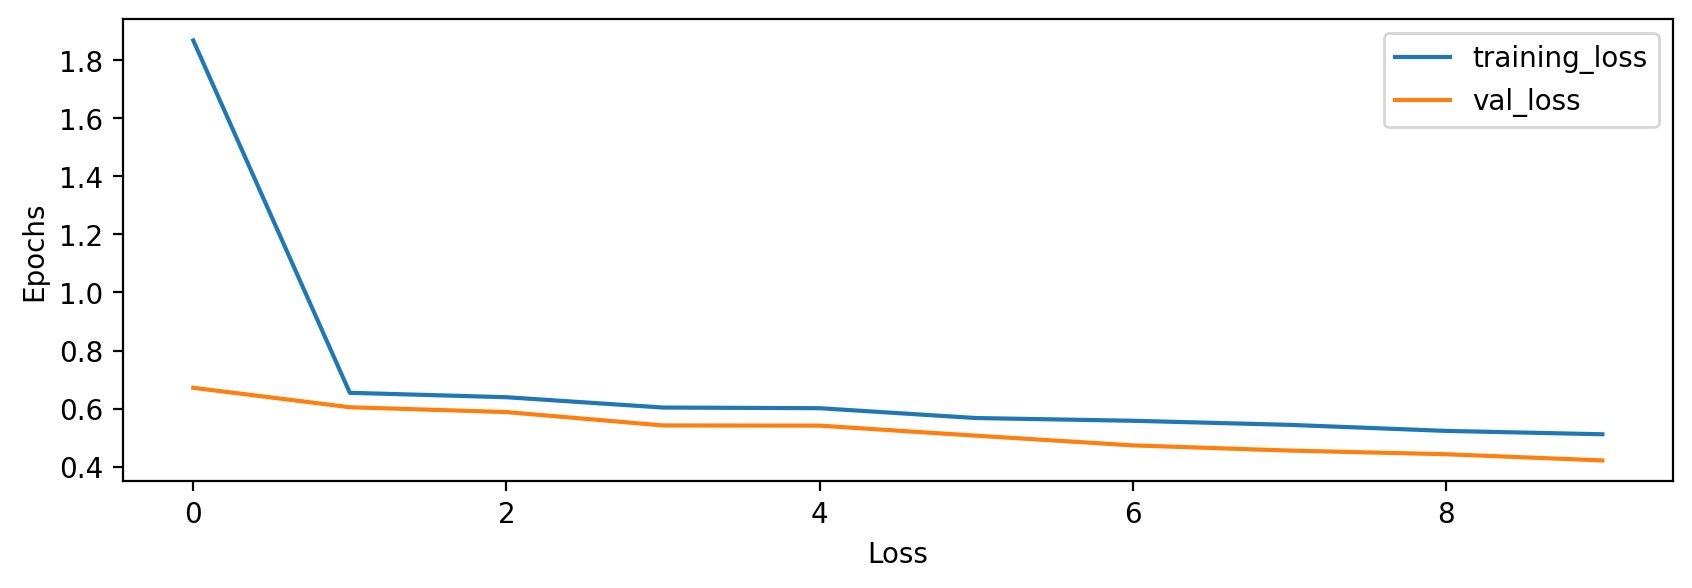

In [28]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

#### Increasing the number of layers to three

In [29]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [30]:
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [31]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

C:\Users\Abisola\AppData\Local\Temp\ipykernel_21120\2581043468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 144s 6s/step - loss: 0.7974 - accuracy: 0.5470 - val_loss: 0.6532 - val_accuracy: 0.6351
Epoch 2/10
23/23 [==============================] - 138s 6s/step - loss: 0.6238 - accuracy: 0.6713 - val_loss: 0.5890 - val_accuracy: 0.7077
Epoch 3/10
23/23 [==============================] - 137s 6s/step - loss: 0.5811 - accuracy: 0.7139 - val_loss: 0.5098 - val_accuracy: 0.7460
Epoch 4/10
23/23 [==============================] - 141s 6s/step - loss: 0.5412 - accuracy: 0.7348 - val_loss: 0.5268 - val_accuracy: 0.7540
Epoch 5/10
23/23 [==============================] - 141s 6s/step - loss: 0.5585 - accuracy: 0.7139 - val_loss: 0.4663 - val_accuracy: 0.7621
Epoch 6/10
23/23 [==============================] - 115s 5s/step - loss: 0.5134 - accuracy: 0.7609 - val_loss: 0.4579 - val_accuracy: 0.7984
Epoch 7/10
23/23 [==============================] - 103s 5s/step - loss: 0.4966 - accuracy: 0.7670 - val_loss: 0.4613 - val_accuracy: 0.7903
Epoch 8/10
23

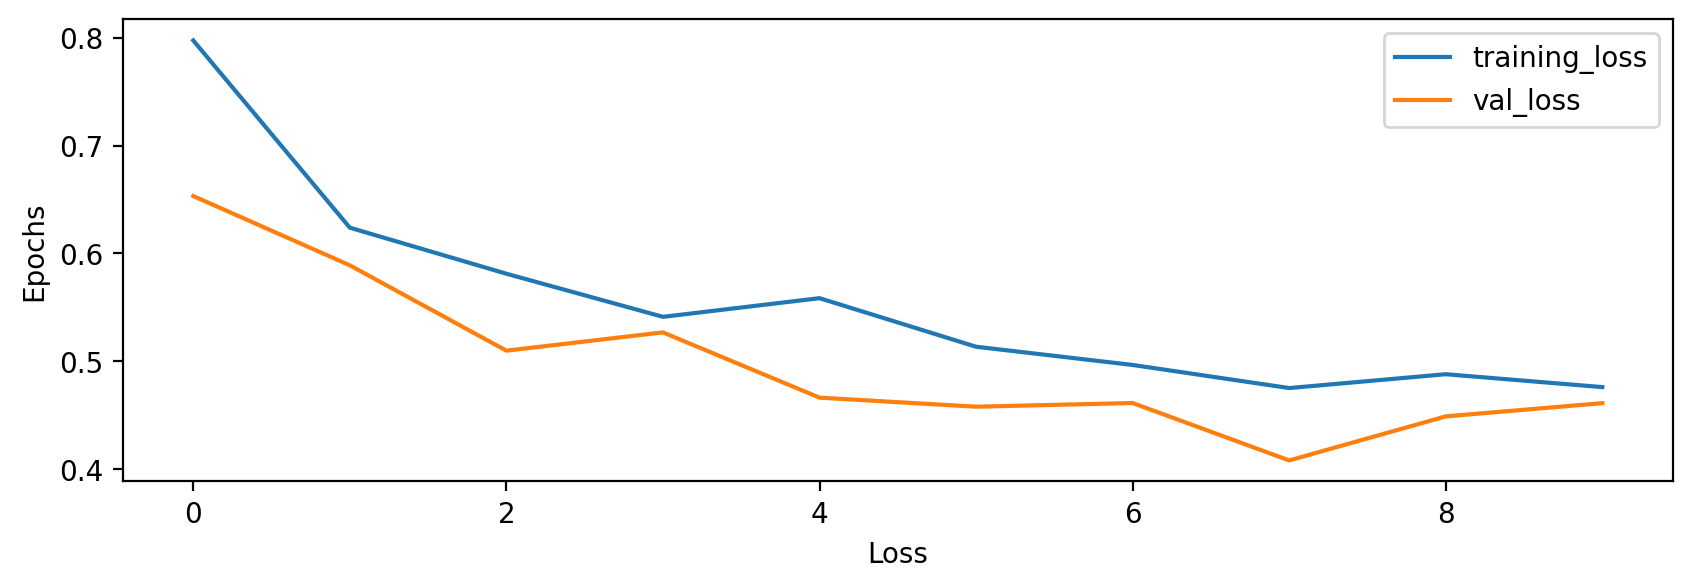

In [32]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

### Evaluation stage

In [33]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
                                             directory=test_dir, # specify the path to the directory
                                             x_col='image_names', # specify the names of the images
                                             y_col='emergency_or_not', # specifies the class labels
                                            class_mode='binary', # specifies the kind of classification
                                             target_size=(224,224), # specifies the dimension to resize the im
                                             batch_size=706 # defines the batch size
                                             )

Found 706 validated image filenames belonging to 2 classes.


In [34]:
# Creating a function to group the vehicles as 0 or 1
def to_binary(items):
    scores = [1 if x[0].numpy() >= 0.5 else 0 for x in items]
    return scores

In [35]:
# Testing all data Predictions
results = to_binary(model(test_generator[0][0]))

In [39]:
#Actual prediction
actual_results= test_generator[0][1]

In [36]:
results

[1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,


### Performance Metrics

In [37]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import metrics

In [40]:
print(classification_report(actual_results, results))

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       410
         1.0       0.70      0.81      0.75       296

    accuracy                           0.78       706
   macro avg       0.77      0.78      0.77       706
weighted avg       0.79      0.78      0.78       706



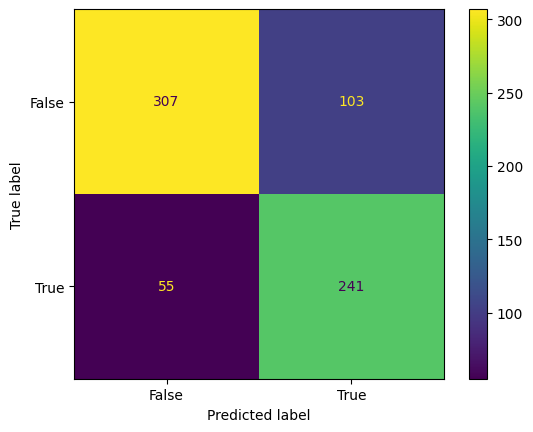

In [41]:
conf_matrix = metrics.confusion_matrix(actual_results, results)
conf_matrix_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
conf_matrix_disp.plot()
plt.show()